# Hydrogen Atom

Author: Bohdan Glisevic

## Introduction
During the modules PHAS0022 Quantum Physics and PHAS0023 Atomic and Molecular Physics at University College London, I acquired some more advanced understanding of behaviour of building blocks of our Universe. I was introduced to fascinating quantum world where it is impossible to perfectly predict exact position of particle in time and so are probabilistic approaches used. In this Jupyter notebook, my aim is to introduce Hydrogen atom as a particle behaving this way. I will first present some theoretical background and try to motivate application of quantum physics. However, I want to note that this notebook was not meant to be and should not be used as an example of a perfect model of Hydrogen atom. At the end of this notebook, I address problems that I have encountered and issues that I have simply neglected. 

## Theoretical Model
Although, I would love to provide here my whole collection of notes which nicely lead to the final wave function of Hydrogen atom, I don't want to make this notebook unnecessarily long. Perhaps some other time. Instead, I will introduce wave function of electron in Hydrogen atom (hydrogenic atom) as it is

\begin{equation}
\psi \left( r, \theta, \phi \right) = R \left( r \right) Y \left( \theta, \phi \right)
\end{equation}

where $R(r)$ is **radial wave function** and $Y(\theta, \phi)$ is **angular wave function**. As the names suggest, each of them will be responsible for wave function in the respective coordinate. 

First, we must find a solution for $R(r)$. Again, I will not provide derivation of the equation, but just simply state it. During the derivation, we would realise that we need two quantum numbers $n$ (principal quantum number) and $l$ (angular (orbital) momentum quantum number). $n$ can have any positive integer value ($n = 1,2,3,...$) and $l$ can have any positive integer value (including 0) which satisfies $l \leq n-1$ ($l =0, 1, 2, 3, ..., (n-1)$). For these quantum numbers, radial wave function can be expressed as 

\begin{equation}
R_{n,l} \left( r \right) = N_{n,l} \left( \frac{2r}{na_0} \right)^l \exp \left( - \frac{r}{na_0} \right) L_{n-l-1}^{2l+1} \left( \frac{2r}{na_0} \right)
\end{equation}

Although this function look rather complicated (and it surely is), we can simply compute most of the parts using handy functions from SciPy (I will indicate which one we use). But for those who would want to try to compute them themselves, here are the functions from the expression which must be solved.

\begin{equation}
\underbrace{N_{n,l} = \left( \frac{2}{na_0} \right)^{\frac{3}{2}} \sqrt{\frac{\left(n-l-1\right)!}{2n\left(n+l\right)!}}}_{\text{normalisation constant}}
\end{equation}

\begin{equation}
\underbrace{L_{a}^{b} \left( x \right) = \sum_{k=0}^{a} \left(-1 \right)^k \frac{\left( a+b \right)!}{\left( a-k \right)! \left(b+k \right)! k!} x^k}_{\text{Laguerre Polynomials}}
\end{equation}

Moreover, $a_0$ is Bohr radius which can be calculated. For simplicity, we let $a_0 = 1$ and work with units of $a_0$. It is much easier then to work with limits in our plots.

As for the angular wave function, we need to apply separation of variables again (first one was used for wave function $\psi \left( r, \theta, \phi \right)$) 

\begin{equation}
Y_{l,m_l} ( \theta, \phi ) = \Phi_{m_l} (\phi) \Theta_{l,m_l} (\theta)
\end{equation}

and then solve individual wave function for angular spherical cooridnates.

\begin{equation}
\Phi_{m_l}(\phi) = \frac{1}{\sqrt{2 \pi}} e^{im_l \phi} 
\end{equation}

\begin{equation}
\Theta_{l,m_l} (\theta) = \left( \frac{(2l+1)(l-|m_l|)!}{2(l+|m_l|)!} \right)^{\frac{1}{2}} P_{l}^{|m_l|} (\cos \theta)
\end{equation}

$P_{l}^{|m_l|} (x)$ are associated Legendre polynomials that are also generated using SciPy function. Again, we can write down equation for finding them.

\begin{equation}
P_{l}^{m_l}(x) = \frac{(-1)^m}{2^l l!} (1-x^2)^{\frac{m_l}{2}} \frac{\text{d}^{l+m_l}}{\text{d}x^{l+m_l}}(x^2-1)^l
\end{equation}

Remember that $m_{l}$ is a magnetic quantum number which determines orientation of azimuthal component of orientation of angular momentum of electron and can have values of $-l \leq m_l \leq l$. Finally, after we obtained all necessary wave functions, we have to transform them to **probability density functions (PDF)** which will give us probability of electron occuring in a certain position. 

\begin{align}
\text{Radial PDF:}\quad & p_{n,l} (r) = |R_{n,l}(r)|^2 r^2  \\
\text{Polar PDF:} \quad & p_{l,m_l} (\theta) = |\Theta_{l,m_l} (\theta)|^2 \sin \theta \\
\text{Azimuthal PDF:} \quad & p_{m_l} (\phi) = |\Phi_{m_l}(\phi)|^2
\end{align}

To obtain probability in each of coordinates, we just have to integrate probability density function over the coordinate.

In the first part of the notebook, I created simple model of Hydrogen atom which can show ground as well as higher excited states. There is a limitation on how big the quantum numbers can be. I don't know exact values as they might be different for your device. Later on, I show the way of how to generalise this atomic model for non-integer quatnum numbers. 

## Libraries
As we mentioned before, most of the functions we stated above are already defined in SciPy Special library. Hence, we jsut have to call them and use them properly. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt               # 2D Plots
from mpl_toolkits import mplot3d              # 3D Plots

from scipy.special import genlaguerre         # Laguerre polynomials
from scipy.special import factorial           # Factorial
from scipy.special import legendre            # Legendre polynomials (1st kind)
from scipy.special import lpmv                # Associated Legendre polynomials

from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

## Hydrogen Atom Wave Functions

In this section, you have to first choose your own qunatum numbers $n$, $l$ and $m_l$. Obey the rules that were stated above and notebook should run smoothly. Plots in this section will give you resulting wave function describing electron in a Hydrogen atom (blue dashed line), probability density function (red line) and calculated discrete random positions (histogram).

In [2]:
n = 3              # principal quantum number
l = 2              # azimuthal quantum number
m = 1              # magnetic quantum number

### Radial Wave Function $R_{n,l} \left( r \right)$

In [3]:
def Radial_wavefunction(n,l):
    '''
    Calculates Radial Wave Function for given quantum numbers n and l
    Input:
        n - principal quantum number [n>0] (integer)
        l - angular momentum quantum number [0≤l<n] (integer)
    Output:
        r - radial distance (float or an array of floats)
        R - radial wave fucntion (float or an array of floats)
    Assumptions:
        - NumPy library is already called
        - genlaguerre form scipy.special is called
        - distance r is in units of a_0 = 1
        - array of radial distance is specified
    '''
    a_0 = 1                                                                                          # Bohr radius
    r = np.linspace(0,int(3 * n**2 -l*(l+1)),1000)                                                                    # Radial distance
    Laguerre = genlaguerre(n-l-1,2*l+1)                                                              # Laguerre Polynomial function
    normalisation_constant = (2 / (n*a_0))**(3/2) * np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))   # Normalisation constant
    R = normalisation_constant * (2*r/(n*a_0))**l * np.exp((-1) * r/(n*a_0)) * Laguerre(2*r/(a_0*n))
    return r, R

<IPython.core.display.Javascript object>


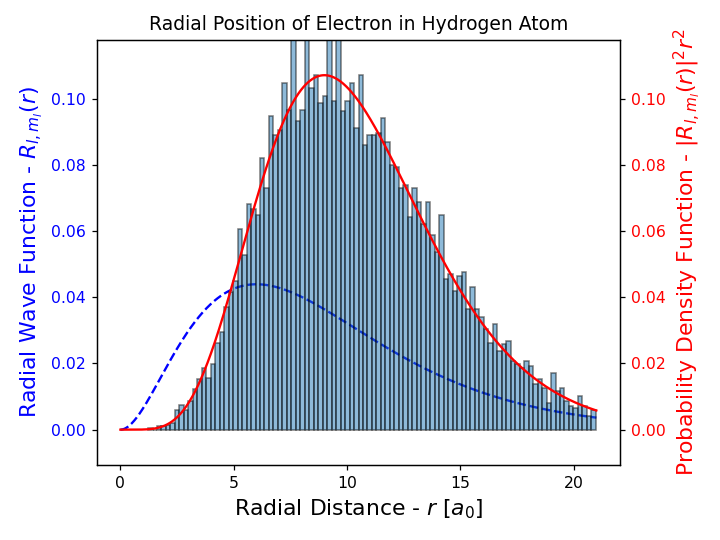

In [4]:
## Calculations ##
r, R = Radial_wavefunction(n,l)                                        # radial position and radial wave function
Probabilities_r = np.abs(R)**2 * r**2                                  # probability density function
weights_r = Probabilities_r / np.sum(Probabilities_r)                  # weights for radnom numbers generatior
data_r = np.random.choice(r, size = 10000, p = weights_r)              # generated discrete random values

## Plot ##
y_max_limit = max(np.append(R,Probabilities_r)) + max(np.append(R,Probabilities_r))/10       # lower limit for y value
y_min_limit = min(np.append(R,Probabilities_r)) - max(np.append(R,Probabilities_r))/10       # upper limit for y value 

fig, ax1 = plt.subplots()      # Wave function

color1 = 'blue'
ax1.set_xlabel(r'Radial Distance - $r$ $[a_0]$', fontsize = 14)
ax1.set_ylabel(r'Radial Wave Function - $R_{l,m_l} (r)$', fontsize = 14, color = color1)
ax1.plot(r,R,'--', color = 'blue', label = r'Wave Function $R$', zorder = 2)
ax1.tick_params(axis= 'y', labelcolor = color1)
ax1.set_ylim(y_min_limit,y_max_limit)

ax2 = ax1.twinx()              # Probability density

color2 = 'red'
ax2.set_ylabel(r'Probability Density Function - $|R_{l,m_l} (r)|^2 r^2$', fontsize = 14, color = color2)
ax2.plot(r, Probabilities_r, color = 'red', label = 'Probability Density Function', zorder = 3)
ax2.hist(data_r,bins=100,density=True,edgecolor='k',alpha = 0.5, label = 'Histogram', zorder = 1)
ax2.tick_params(axis= 'y', labelcolor = color2)
ax2.set_ylim(y_min_limit,y_max_limit)


plt.title('Radial Position of Electron in Hydrogen Atom')
fig.tight_layout()
plt.show()

### Azimuthal Wave Function $\Phi_{m_l}(\phi)$

In [5]:
def Phi_wavefunction(m):
    '''
    Calculates Azimuthal Wave Function for given quantum number m
    Input:
        m - magnetic quantum number [any integer between -l and l] (integer)
    Output:
        phi - azimuthal angle (float or an array of floats)
        Phi - azimuthal wave fucntion (float or an array of floats)
    Assumptions:
        - NumPy library is already called
        - array of azimuthal angles is specified
    '''
    phi = np.linspace(0,2*np.pi,1000)                     # values of azimuthal positions
    Phi = 1/np.sqrt(2*np.pi) * np.exp(m*phi*1j)
    return phi, Phi

<IPython.core.display.Javascript object>


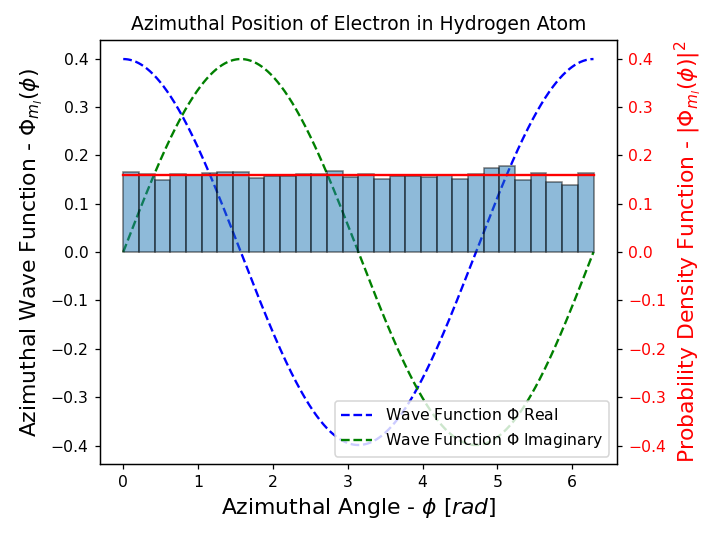

In [6]:
## Calculations ##
phi, Phi = Phi_wavefunction(m)                                      # azimuthal position and azimuthal wave function 
Probabilities_phi = np.abs(Phi)**2                                  # probability density function
weights_phi = Probabilities_phi / np.sum(Probabilities_phi)         # weights for radnom numbers generatior 
data_phi = np.random.choice(phi, size = 10000, p = weights_phi)     # generated discrete random values 

## Plot ##
y_max_limit = max(np.append(Phi.real,Probabilities_phi)) + max(np.append(Phi.real,Probabilities_phi))/10
y_min_limit = min(np.append(Phi.real,Probabilities_phi)) - max(np.append(Phi.real,Probabilities_phi))/10

fig, ax1 = plt.subplots()        # Wave function

color1 = 'blue'
ax1.set_xlabel(r'Azimuthal Angle - $\phi$ $[rad]$', fontsize = 14)
ax1.set_ylabel(r'Azimuthal Wave Function - $\Phi_{m_l}(\phi)$', fontsize = 14)
ax1.plot(phi, Phi.real, '--', color = 'blue', label = r'Wave Function $\Phi$ Real', zorder = 2)
ax1.plot(phi, Phi.imag, '--', color = 'green', label = r'Wave Function $\Phi$ Imaginary', zorder = 3)
#ax1.tick_params(axis= 'y', labelcolor = color1)
ax1.set_ylim(y_min_limit,y_max_limit)
plt.legend(loc = 'lower right')

ax2 = ax1.twinx()                # Probability density

color2 = 'red'
ax2.set_ylabel(r'Probability Density Function - $|\Phi_{m_l}(\phi)|^2$', fontsize = 14, color = color2)
ax2.plot(phi, Probabilities_phi, color = 'red', label = 'Probability Density Function', zorder = 4)
ax2.hist(data_phi,bins=30,density=True,edgecolor='k', alpha = 0.5, label = 'Histogram', zorder = 1)
ax2.tick_params(axis= 'y', labelcolor = color2)
ax2.set_ylim(y_min_limit,y_max_limit)

plt.title('Azimuthal Position of Electron in Hydrogen Atom')
fig.tight_layout()
plt.show()

## Polar Wave Function $\Theta_{l,m_l} (\theta)$

In [7]:
def Theta_wavefunction(l,m):
    '''
    Calculates Polar Wave Function for given quantum numbers l and m
    Input:
        l - angular momentum quantum number [0≤l<n] (integer)
        m - magnetic quantum number [any integer between -l and l] (integer)
    Output:
        theta - polar angle (float or an array of floats)
        Theta - polar wave fucntion (float or an array of floats)
    Assumptions:
        - NumPy library is already called
        - array of polar angles is specified
        - function from scipy.special lpmv for Associated Legendre polynomials is called
    '''
    theta = np.linspace(0,np.pi,1000)                                                          # values of polar position
    normalisation = np.sqrt((2*l+1) * factorial(l-np.abs(m)) / (2*factorial(l+np.abs(m))))     # normalisation constant
    Theta = normalisation * lpmv(np.abs(m),l,np.cos(theta))
    return theta, Theta

<IPython.core.display.Javascript object>


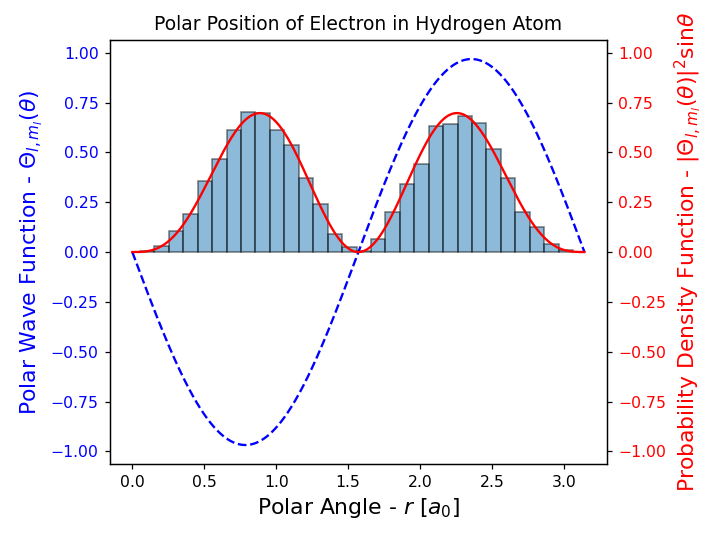

In [8]:
## Calculations ##
theta, Theta = Theta_wavefunction(l,m)                                  # polar position and polar wave function
Probabilities_theta = np.abs(Theta)**2 * np.sin(theta)                  # probability density function
weights_theta = Probabilities_theta / np.sum(Probabilities_theta)       # weights for radnom numbers generatior 
data_theta = np.random.choice(theta, size = 10000, p = weights_theta)   # generated discrete random values 

## Plot ##
y_max_limit = max(np.append(Theta,Probabilities_theta)) + max(np.append(Theta,Probabilities_theta))/10
y_min_limit = min(np.append(Theta,Probabilities_theta)) - max(np.append(Theta,Probabilities_theta))/10

fig, ax1 = plt.subplots()         # Wave function

color1 = 'blue'
ax1.set_xlabel(r'Polar Angle - $r$ $[a_0]$', fontsize = 14)
ax1.set_ylabel(r'Polar Wave Function - $\Theta_{l,m_l} (\theta)$', fontsize = 14, color = color1)
ax1.plot(theta,Theta,'--', color = 'blue', label = r'Wave Function $R$', zorder = 2)
ax1.tick_params(axis= 'y', labelcolor = color1)
ax1.set_ylim(y_min_limit,y_max_limit)

ax2 = ax1.twinx()                 # Probability density

color2 = 'red'
ax2.set_ylabel(r'Probability Density Function - $|\Theta_{l,m_l} (\theta)|^2 \sin \theta$', fontsize = 14, color = color2)
ax2.plot(theta, Probabilities_theta, color = 'red', label = 'Probability Density Function', zorder = 3)
ax2.hist(data_theta,bins=30,density=True,edgecolor='k',alpha = 0.5, label = 'Histogram', zorder = 1)
ax2.tick_params(axis= 'y', labelcolor = color2)
ax2.set_ylim(y_min_limit,y_max_limit)

plt.title('Polar Position of Electron in Hydrogen Atom')
fig.tight_layout()
plt.show()

### Hydrogen Atom - 3D model

In [9]:
def spherical_2_cartesian(r,theta,phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x,y,z

def polar_2_cartesian(r,theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y

def plot_3D(n,l,m,noe,color):
    N = 20                                        # number of angular divisions
    phi   = np.linspace(0, 2*np.pi, N)            # azimuthal angles
    theta = np.linspace(0,   np.pi, N)            # polar angles
    theta, phi = np.meshgrid(theta, phi)
    r = 1                                         # radius of the electon (in the plot)
    
    x,y,z = spherical_2_cartesian(r,theta,phi)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    
    for i in range(noe):
        X,Y,Z = spherical_2_cartesian(data_r[i],data_theta[i],data_phi[i])
        ax.plot_surface(x+X,y+Y,z+Z, color = color)
    a = max(data_r)
    ax.set_xlim(-a,a)
    ax.set_ylim(-a,a)
    ax.set_zlim(-a,a)
    #ax.view_init(90,0)
    ax.set_xlabel(r'$x$ position $[a_0]$')
    ax.set_ylabel(r'$y$ position $[a_0]$')
    ax.set_zlabel(r'$z$ position $[a_0]$')
    #plt.axis('off')
    #plt.savefig(f'hydrogen_({n},{l},{m}).png', dpi = 1000, transparent = True)
    plt.show()
    return print(f'Hydrogen ({n},{l},{m})')

def plot_2D(n,l,m,noe,colormap,color):
    ## Fading colors plot ## 
    ncolors = 256
    color_array = plt.get_cmap(colormap)(range(ncolors))
    color_array[:,-1] = np.linspace(0.0,1.0,ncolors)
    map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)
    plt.register_cmap(cmap=map_object)
    
    plt.figure()
    X,Y = polar_2_cartesian(data_r,data_theta)
    a = max(np.append(max(abs(X)),max(abs(Y))))
    plt.plot(X,Y, 'o' , color = color, markersize = 0.3)
    plt.plot(X,-Y, 'o' , color = color, markersize = 0.3)
    plt.xlim(-(a+0.1*a),(a+0.1*a))
    plt.ylim(-(a+0.1*a),(a+0.1*a))
    plt.axis('off')
    plt.axis('equal')
    #plt.savefig('plot_2D_scatted.png', dpi = 1000, transparent = True)
    plt.figure()
    plt.hexbin(X, Y, cmap='rainbow_alpha', edgecolors = None, gridsize=100)
    plt.hexbin(X, -Y, cmap='rainbow_alpha', edgecolors = None, gridsize=100)
    plt.axis('off')
    plt.axis('equal')
    plt.xlim(-(a+0.1*a),(a+0.1*a))
    plt.ylim(-(a+0.1*a),(a+0.1*a))
    #plt.savefig('plot_2D_hexagon.png', dpi = 1000, transparent = True)
    
    plt.show()
    return print(f'Hydrogen ({n},{l},{m})')

def plot_3D_lite(R,THETA,PHI):
    N = 10
    phi   = np.linspace(0, 2*np.pi, N)
    theta = np.linspace(0,   np.pi, N)
    theta, phi = np.meshgrid(theta, phi)
    r = 0.5
    
    x,y,z = spherical_2_cartesian(r,theta,phi)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    
    X,Y,Z = spherical_2_cartesian(R,THETA,PHI)
    ax.plot(X,Y,Z, 'o' , color = 'blue', markersize = 0.3)
    a = max(R)
    ax.set_xlim(-a,a)
    ax.set_ylim(-a,a)
    ax.set_zlim(-a,a)
    ax.set_xlabel(r'$x$ position $[a_0]$')
    ax.set_ylabel(r'$y$ position $[a_0]$')
    ax.set_zlabel(r'$z$ position $[a_0]$')
    #ax.view_init(0,90)
    #plt.savefig('test_hydrogen_2.png', dpi = 2000)
    plt.show()
    return print(f'Hydrogen ({n},{l},{m})')

<IPython.core.display.Javascript object>


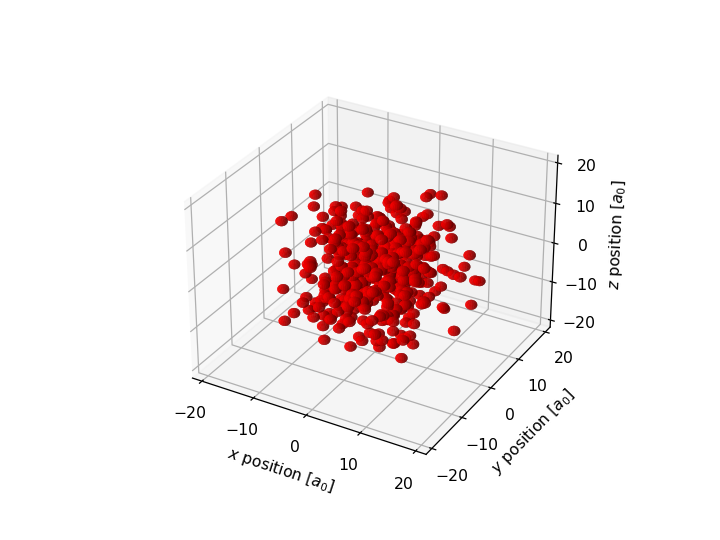

Hydrogen (3,2,1)


<IPython.core.display.Javascript object>


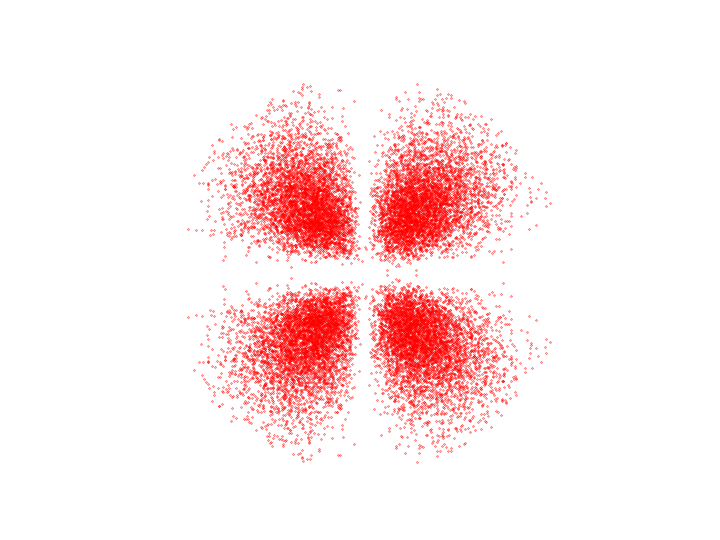

<IPython.core.display.Javascript object>


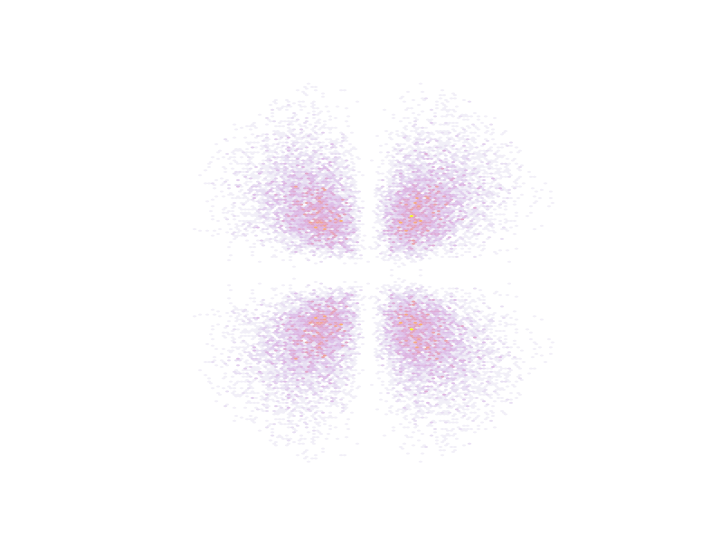

Hydrogen (3,2,1)


<IPython.core.display.Javascript object>


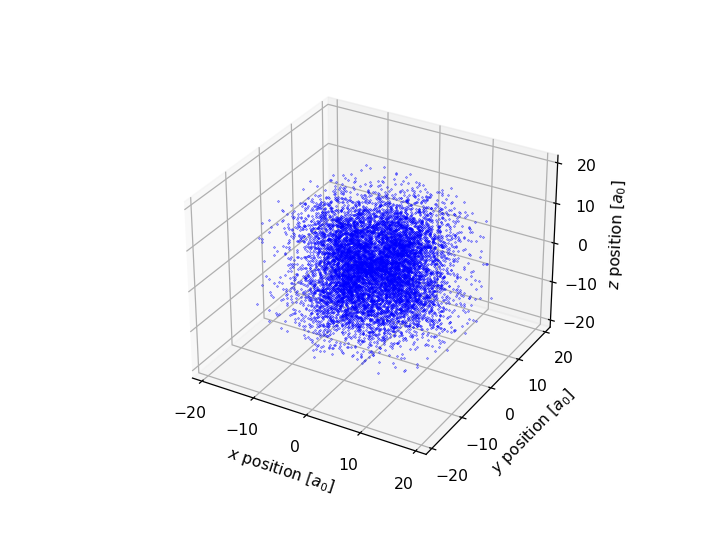

Hydrogen (3,2,1)


In [10]:
plot_3D(n,l,m,500,'red')
plot_2D(n,l,m,1000,'plasma','red')
plot_3D_lite(data_r,data_theta,data_phi)

### References

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.genlaguerre.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.factorial.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.legendre.html

https://docs.scipy.org/doc/scipy/tutorial/integrate.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lpmn.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lpmv.html#scipy.special.lpmv

https://numpy.org/doc/stable/reference/generated/numpy.polyder.html#numpy.polyder